In [6]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np

In [7]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [8]:
SNR_array_3 = []
random_scale = 2800

In [9]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)

13 13
wvfrm = 


l =  0  SNR =  8.142506458063393  m1 =  13  m2 =  13
13 11
wvfrm = 
l =  1  SNR =  5.878732358290894  m1 =  13  m2 =  11
22 10
wvfrm = 
l =  2  SNR =  8.055409107804884  m1 =  22  m2 =  10
28 25
wvfrm = 
l =  3  SNR =  9.367504253117003  m1 =  28  m2 =  25
19 27
wvfrm = 
l =  4  SNR =  10.709519526068917  m1 =  19  m2 =  27
17 14
wvfrm = 
l =  5  SNR =  7.317419961428224  m1 =  17  m2 =  14
22 20
wvfrm = 
l =  6  SNR =  8.009274598330212  m1 =  22  m2 =  20
10 21
wvfrm = 
l =  7  SNR =  7.944905723829826  m1 =  10  m2 =  21
24 27
wvfrm = 
l =  8  SNR =  11.654224078571442  m1 =  24  m2 =  27
29 21
wvfrm = 
l =  8  SNR =  9.565723971223672  m1 =  29  m2 =  21
10 26
wvfrm = 
l =  9  SNR =  6.607008155046798  m1 =  10  m2 =  26
21 12
wvfrm = 
l =  10  SNR =  7.843880016558603  m1 =  21  m2 =  12
29 20
wvfrm = 
l =  11  SNR =  10.927401495167485  m1 =  29  m2 =  20
19 25
wvfrm = 
l =  12  SNR =  10.210674190192025  m1 =  19  m2 =  25
19 26
wvfrm = 
l =  13  SNR =  10.679855433513005  m1 = 

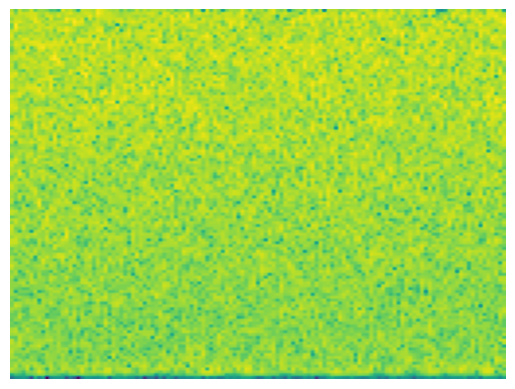

In [10]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

22 23
wvfrm = 
l =  100  SNR =  11.369666192486267  m1 =  22  m2 =  23
16 17
wvfrm = 
l =  100  SNR =  10.517563163310642  m1 =  16  m2 =  17
11 23
wvfrm = 
l =  101  SNR =  7.527936970502474  m1 =  11  m2 =  23
13 18
wvfrm = 
l =  102  SNR =  7.461703172014919  m1 =  13  m2 =  18
23 14
wvfrm = 
l =  103  SNR =  6.727454073658797  m1 =  23  m2 =  14
15 18
wvfrm = 
l =  104  SNR =  8.192442729911454  m1 =  15  m2 =  18
14 12
wvfrm = 
l =  105  SNR =  5.44254239541462  m1 =  14  m2 =  12
18 17
wvfrm = 
l =  106  SNR =  9.769490423717013  m1 =  18  m2 =  17
11 30
wvfrm = 
l =  107  SNR =  8.152767452986451  m1 =  11  m2 =  30
21 22
wvfrm = 
l =  108  SNR =  11.410898740217675  m1 =  21  m2 =  22
20 11
wvfrm = 
l =  108  SNR =  6.374826807406772  m1 =  20  m2 =  11
27 17
wvfrm = 
l =  109  SNR =  9.593427089103821  m1 =  27  m2 =  17
24 21
wvfrm = 
l =  110  SNR =  9.795167247407027  m1 =  24  m2 =  21
28 12
wvfrm = 
l =  111  SNR =  7.27284637363905  m1 =  28  m2 =  12
24 27
wvfrm = 
l = 

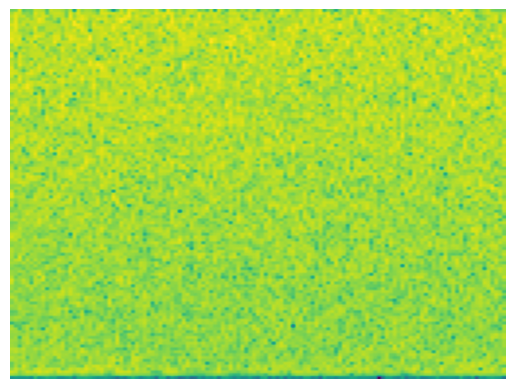

In [11]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

17 27
wvfrm = 
l =  200  SNR =  8.160439961861304  m1 =  17  m2 =  27
28 21
wvfrm = 
l =  201  SNR =  10.642928050311008  m1 =  28  m2 =  21
25 26
wvfrm = 
l =  202  SNR =  9.56132624814065  m1 =  25  m2 =  26
15 13
wvfrm = 
l =  203  SNR =  8.536294503657833  m1 =  15  m2 =  13
11 11
wvfrm = 
l =  204  SNR =  6.325766034323324  m1 =  11  m2 =  11
12 12
wvfrm = 
l =  205  SNR =  7.498773876186249  m1 =  12  m2 =  12
17 18
wvfrm = 
l =  206  SNR =  7.86663045674767  m1 =  17  m2 =  18
20 19
wvfrm = 
l =  207  SNR =  9.234923830303828  m1 =  20  m2 =  19
24 17
wvfrm = 
l =  208  SNR =  10.71332469941761  m1 =  24  m2 =  17
13 18
wvfrm = 
l =  209  SNR =  8.827937010595491  m1 =  13  m2 =  18
29 20
wvfrm = 
l =  210  SNR =  12.299978062347074  m1 =  29  m2 =  20
18 21
wvfrm = 
l =  210  SNR =  10.240424182331434  m1 =  18  m2 =  21
28 18
wvfrm = 
l =  211  SNR =  10.642179518875592  m1 =  28  m2 =  18
18 11
wvfrm = 
l =  212  SNR =  6.725636465343399  m1 =  18  m2 =  11
12 16
wvfrm = 
l =

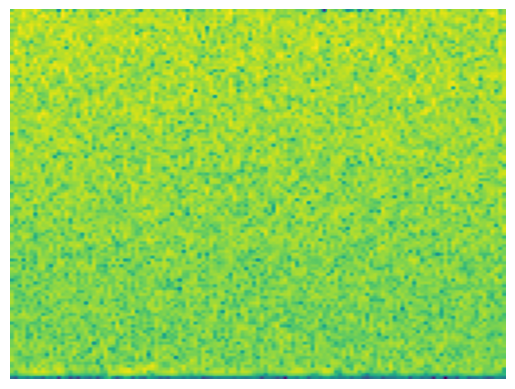

In [12]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 28
wvfrm = 
l =  300  SNR =  10.53757909205789  m1 =  18  m2 =  28
15 25
wvfrm = 
l =  301  SNR =  11.530935395454415  m1 =  15  m2 =  25
10 15
wvfrm = 
l =  301  SNR =  4.877498068853012  m1 =  10  m2 =  15
14 26
wvfrm = 
l =  301  SNR =  9.080962381959656  m1 =  14  m2 =  26
16 24
wvfrm = 
l =  302  SNR =  7.789291454079678  m1 =  16  m2 =  24
18 24
wvfrm = 
l =  303  SNR =  9.92462983372722  m1 =  18  m2 =  24
10 10
wvfrm = 
l =  304  SNR =  6.411877240024566  m1 =  10  m2 =  10
12 18
wvfrm = 
l =  305  SNR =  6.720419976540955  m1 =  12  m2 =  18
10 26
wvfrm = 
l =  306  SNR =  4.857307943995982  m1 =  10  m2 =  26
16 16
wvfrm = 
l =  306  SNR =  7.35475728902766  m1 =  16  m2 =  16
10 25
wvfrm = 
l =  307  SNR =  8.515964300144386  m1 =  10  m2 =  25
13 24
wvfrm = 
l =  308  SNR =  7.907558272957963  m1 =  13  m2 =  24
27 17
wvfrm = 
l =  309  SNR =  11.190251425276843  m1 =  27  m2 =  17
17 17
wvfrm = 
l =  309  SNR =  9.526347026238401  m1 =  17  m2 =  17
25 29
wvfrm = 
l =  

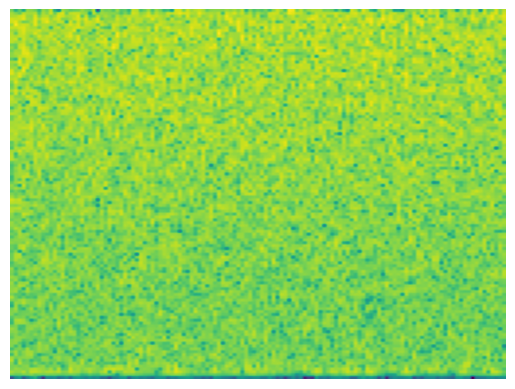

In [13]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

29 16
wvfrm = 
l =  400  SNR =  10.084474450045253  m1 =  29  m2 =  16
20 28
wvfrm = 
l =  401  SNR =  11.03869695893326  m1 =  20  m2 =  28
24 24
wvfrm = 
l =  401  SNR =  10.981232963804821  m1 =  24  m2 =  24
15 14
wvfrm = 
l =  402  SNR =  7.365021474403927  m1 =  15  m2 =  14
28 15
wvfrm = 
l =  403  SNR =  9.393745882440744  m1 =  28  m2 =  15
12 24
wvfrm = 
l =  404  SNR =  8.580728746866283  m1 =  12  m2 =  24
16 20
wvfrm = 
l =  405  SNR =  8.814312308206292  m1 =  16  m2 =  20
21 10
wvfrm = 
l =  406  SNR =  8.166778935916309  m1 =  21  m2 =  10
26 20
wvfrm = 
l =  407  SNR =  8.100097992591756  m1 =  26  m2 =  20
25 29
wvfrm = 
l =  408  SNR =  12.29238963667629  m1 =  25  m2 =  29
27 11
wvfrm = 
l =  408  SNR =  6.503647141444161  m1 =  27  m2 =  11
14 17
wvfrm = 
l =  409  SNR =  8.166973619200864  m1 =  14  m2 =  17
12 28
wvfrm = 
l =  410  SNR =  7.801248903095928  m1 =  12  m2 =  28
30 21
wvfrm = 
l =  411  SNR =  10.598877840265502  m1 =  30  m2 =  21
14 22
wvfrm = 
l 

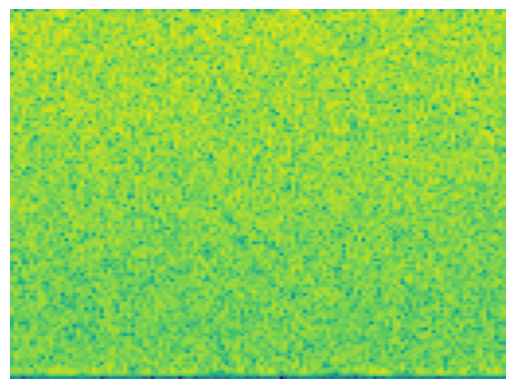

In [14]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [15]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 24
wvfrm = 
l =  500  SNR =  9.518400282397169  m1 =  25  m2 =  24
19 26
wvfrm = 
l =  501  SNR =  8.948829270793004  m1 =  19  m2 =  26
12 25
wvfrm = 
l =  502  SNR =  8.522452179375458  m1 =  12  m2 =  25
22 21
wvfrm = 
l =  503  SNR =  10.59531703843273  m1 =  22  m2 =  21
13 27
wvfrm = 
l =  504  SNR =  9.140346269068404  m1 =  13  m2 =  27
15 18
wvfrm = 
l =  505  SNR =  6.496611277639065  m1 =  15  m2 =  18
19 17
wvfrm = 
l =  506  SNR =  9.258962269147457  m1 =  19  m2 =  17
13 21
wvfrm = 
l =  507  SNR =  6.67675707192815  m1 =  13  m2 =  21
11 28
wvfrm = 
l =  508  SNR =  6.321282898563768  m1 =  11  m2 =  28
17 22
wvfrm = 
l =  509  SNR =  9.12323824734563  m1 =  17  m2 =  22
22 14
wvfrm = 
l =  510  SNR =  8.356564694109856  m1 =  22  m2 =  14
30 17
wvfrm = 
l =  511  SNR =  11.201329474733337  m1 =  30  m2 =  17
25 24
wvfrm = 
l =  511  SNR =  11.14386594524834  m1 =  25  m2 =  24
18 13
wvfrm = 
l =  511  SNR =  8.393860956186257  m1 =  18  m2 =  13
19 25
wvfrm = 
l =  5

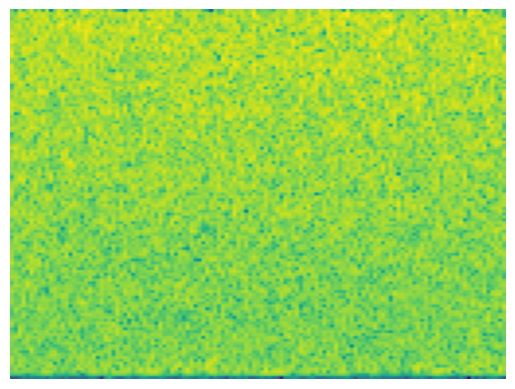

In [16]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 16
wvfrm = 
l =  600  SNR =  8.843213660347134  m1 =  21  m2 =  16
22 10
wvfrm = 
l =  601  SNR =  5.523383930540325  m1 =  22  m2 =  10
29 14
wvfrm = 
l =  602  SNR =  9.22172791046237  m1 =  29  m2 =  14
15 23
wvfrm = 
l =  603  SNR =  9.193782649442918  m1 =  15  m2 =  23
14 26
wvfrm = 
l =  604  SNR =  10.225003386823767  m1 =  14  m2 =  26
19 15
wvfrm = 
l =  605  SNR =  8.755103169708109  m1 =  19  m2 =  15
13 24
wvfrm = 
l =  606  SNR =  8.293335278061136  m1 =  13  m2 =  24
29 14
wvfrm = 
l =  607  SNR =  8.729028119990678  m1 =  29  m2 =  14
29 27
wvfrm = 
l =  608  SNR =  11.570042103008907  m1 =  29  m2 =  27
14 28
wvfrm = 
l =  608  SNR =  10.631988890049792  m1 =  14  m2 =  28
21 23
wvfrm = 
l =  609  SNR =  10.830832136884304  m1 =  21  m2 =  23
23 22
wvfrm = 
l =  610  SNR =  12.136903018676962  m1 =  23  m2 =  22
16 29
wvfrm = 
l =  610  SNR =  9.756397900207295  m1 =  16  m2 =  29
13 19
wvfrm = 
l =  611  SNR =  7.35999832893825  m1 =  13  m2 =  19
27 30
wvfrm = 
l 

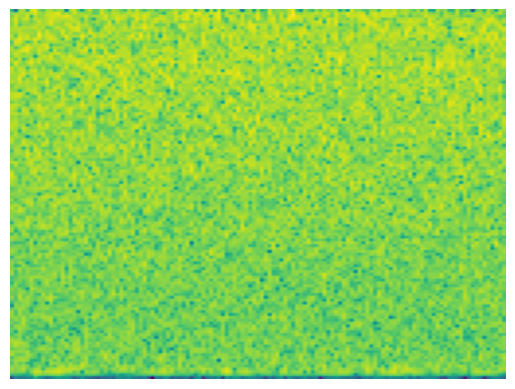

In [17]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

30 24
wvfrm = 
l =  700  SNR =  12.072948752253295  m1 =  30  m2 =  24
21 14
wvfrm = 
l =  700  SNR =  9.048110165607829  m1 =  21  m2 =  14
16 21
wvfrm = 
l =  701  SNR =  8.989180325747688  m1 =  16  m2 =  21
21 16
wvfrm = 
l =  702  SNR =  10.438866543152601  m1 =  21  m2 =  16
24 27
wvfrm = 
l =  703  SNR =  10.681417165173077  m1 =  24  m2 =  27
15 22
wvfrm = 
l =  704  SNR =  8.402105523366195  m1 =  15  m2 =  22
15 22
wvfrm = 
l =  705  SNR =  8.761669735604872  m1 =  15  m2 =  22
13 17
wvfrm = 
l =  706  SNR =  8.202185862279373  m1 =  13  m2 =  17
20 26
wvfrm = 
l =  707  SNR =  10.274184771800327  m1 =  20  m2 =  26
12 24
wvfrm = 
l =  708  SNR =  6.510968171623922  m1 =  12  m2 =  24
29 15
wvfrm = 
l =  709  SNR =  9.736726671775617  m1 =  29  m2 =  15
23 11
wvfrm = 
l =  710  SNR =  8.5843385748006  m1 =  23  m2 =  11
26 16
wvfrm = 
l =  711  SNR =  10.369811569393951  m1 =  26  m2 =  16
19 11
wvfrm = 
l =  712  SNR =  7.486859006125814  m1 =  19  m2 =  11
24 25
wvfrm = 
l 

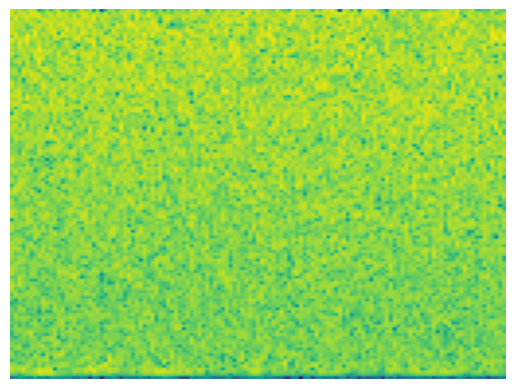

In [18]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

17 19
wvfrm = 
l =  800  SNR =  9.073707735314338  m1 =  17  m2 =  19
12 30
wvfrm = 
l =  801  SNR =  7.971229882711208  m1 =  12  m2 =  30
26 27
wvfrm = 
l =  802  SNR =  11.956069141757133  m1 =  26  m2 =  27
14 21
wvfrm = 
l =  802  SNR =  7.6088156757616145  m1 =  14  m2 =  21
25 30
wvfrm = 
l =  803  SNR =  12.391413669196133  m1 =  25  m2 =  30
29 29
wvfrm = 
l =  803  SNR =  12.516908282443158  m1 =  29  m2 =  29
18 24
wvfrm = 
l =  803  SNR =  9.819386709974667  m1 =  18  m2 =  24
17 21
wvfrm = 
l =  804  SNR =  9.691878303649919  m1 =  17  m2 =  21
26 14
wvfrm = 
l =  805  SNR =  9.012120691402187  m1 =  26  m2 =  14
28 20
wvfrm = 
l =  806  SNR =  11.483475195435629  m1 =  28  m2 =  20
16 23
wvfrm = 
l =  806  SNR =  7.094294784731096  m1 =  16  m2 =  23
17 15
wvfrm = 
l =  807  SNR =  9.39010179016758  m1 =  17  m2 =  15
12 24
wvfrm = 
l =  808  SNR =  8.364553159574363  m1 =  12  m2 =  24
14 19
wvfrm = 
l =  809  SNR =  9.517210935813099  m1 =  14  m2 =  19
16 14
wvfrm = 
l

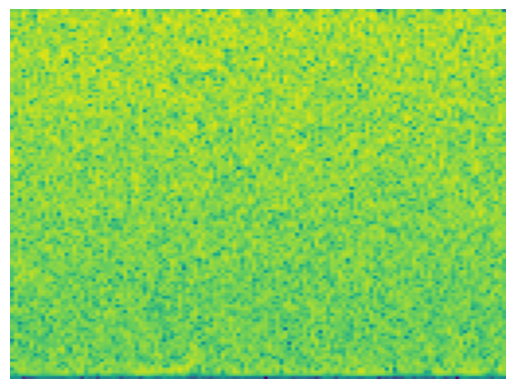

In [19]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

27 21
wvfrm = 
l =  900  SNR =  12.59397598355588  m1 =  27  m2 =  21
28 10
wvfrm = 
l =  900  SNR =  5.394330646349828  m1 =  28  m2 =  10
27 28
wvfrm = 
l =  901  SNR =  11.206848925078049  m1 =  27  m2 =  28
29 28
wvfrm = 
l =  901  SNR =  11.774521953111533  m1 =  29  m2 =  28
25 19
wvfrm = 
l =  901  SNR =  10.497611392165515  m1 =  25  m2 =  19
26 25
wvfrm = 
l =  902  SNR =  9.261871188796523  m1 =  26  m2 =  25
24 19
wvfrm = 
l =  903  SNR =  9.532183573938807  m1 =  24  m2 =  19
30 21
wvfrm = 
l =  904  SNR =  10.314947923659876  m1 =  30  m2 =  21
27 25
wvfrm = 
l =  905  SNR =  10.561080546174608  m1 =  27  m2 =  25
16 20
wvfrm = 
l =  906  SNR =  10.421436414902816  m1 =  16  m2 =  20
22 26
wvfrm = 
l =  907  SNR =  9.81097840181319  m1 =  22  m2 =  26
12 27
wvfrm = 
l =  908  SNR =  7.329976960272476  m1 =  12  m2 =  27
26 19
wvfrm = 
l =  909  SNR =  8.31502464509482  m1 =  26  m2 =  19
14 10
wvfrm = 
l =  910  SNR =  6.008335383523149  m1 =  14  m2 =  10
19 23
wvfrm = 
l

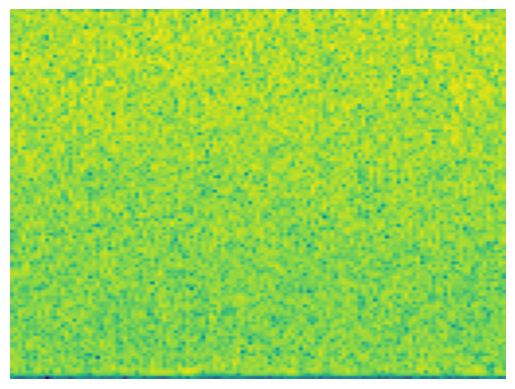

In [20]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

17 29
wvfrm = 
l =  1000  SNR =  9.127793096086563  m1 =  17  m2 =  29
26 18
wvfrm = 
l =  1001  SNR =  8.513474905498857  m1 =  26  m2 =  18
19 25
wvfrm = 
l =  1002  SNR =  10.486455084566826  m1 =  19  m2 =  25
11 19
wvfrm = 
l =  1003  SNR =  9.42093917269512  m1 =  11  m2 =  19
16 13
wvfrm = 
l =  1004  SNR =  8.929177904861428  m1 =  16  m2 =  13
23 19
wvfrm = 
l =  1005  SNR =  8.917518816861195  m1 =  23  m2 =  19
20 29
wvfrm = 
l =  1006  SNR =  10.126848644603262  m1 =  20  m2 =  29
15 17
wvfrm = 
l =  1007  SNR =  6.260842676952764  m1 =  15  m2 =  17
30 29
wvfrm = 
l =  1008  SNR =  12.368238880097781  m1 =  30  m2 =  29
23 14
wvfrm = 
l =  1008  SNR =  9.753269282019849  m1 =  23  m2 =  14
26 27
wvfrm = 
l =  1009  SNR =  10.244247556834704  m1 =  26  m2 =  27
14 21
wvfrm = 
l =  1010  SNR =  8.632423680094933  m1 =  14  m2 =  21
29 21
wvfrm = 
l =  1011  SNR =  10.553659376572103  m1 =  29  m2 =  21
13 23
wvfrm = 
l =  1012  SNR =  10.680345128309769  m1 =  13  m2 =  23
2

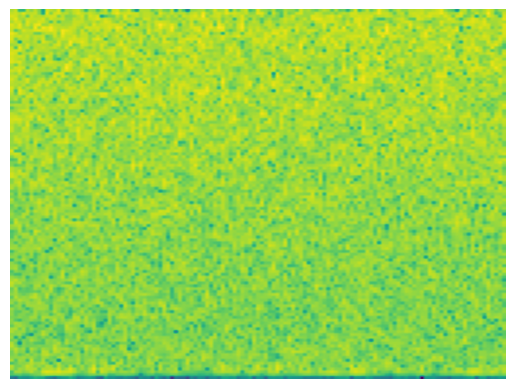

In [21]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 17
wvfrm = 
l =  1100  SNR =  7.5727465729644665  m1 =  24  m2 =  17
13 11
wvfrm = 
l =  1101  SNR =  5.184796068907553  m1 =  13  m2 =  11
24 25
wvfrm = 
l =  1102  SNR =  9.387536820692759  m1 =  24  m2 =  25
30 17
wvfrm = 
l =  1103  SNR =  10.136088047687783  m1 =  30  m2 =  17
19 15
wvfrm = 
l =  1104  SNR =  6.675499431966816  m1 =  19  m2 =  15
12 12
wvfrm = 
l =  1105  SNR =  6.844312302238829  m1 =  12  m2 =  12
20 25
wvfrm = 
l =  1106  SNR =  11.50282457675057  m1 =  20  m2 =  25
24 30
wvfrm = 
l =  1106  SNR =  14.180680666069222  m1 =  24  m2 =  30
24 20
wvfrm = 
l =  1106  SNR =  9.842717073200978  m1 =  24  m2 =  20
22 15
wvfrm = 
l =  1107  SNR =  7.8574620400705815  m1 =  22  m2 =  15
19 15
wvfrm = 
l =  1108  SNR =  6.90650424980934  m1 =  19  m2 =  15
22 29
wvfrm = 
l =  1109  SNR =  11.369281424021493  m1 =  22  m2 =  29
28 14
wvfrm = 
l =  1109  SNR =  9.629674023563755  m1 =  28  m2 =  14
13 27
wvfrm = 
l =  1110  SNR =  8.964125056898162  m1 =  13  m2 =  27
15

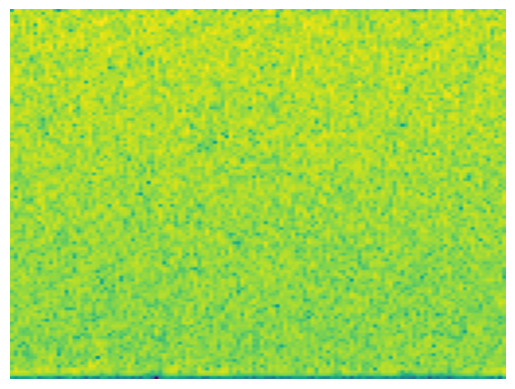

In [22]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 18
wvfrm = 
l =  1200  SNR =  8.577608592345147  m1 =  21  m2 =  18
11 28
wvfrm = 
l =  1201  SNR =  8.453402682728006  m1 =  11  m2 =  28
29 23
wvfrm = 
l =  1202  SNR =  12.778551129299839  m1 =  29  m2 =  23
29 12
wvfrm = 
l =  1202  SNR =  8.802017913536178  m1 =  29  m2 =  12
17 29
wvfrm = 
l =  1203  SNR =  8.464621409196605  m1 =  17  m2 =  29
25 16
wvfrm = 
l =  1204  SNR =  9.079243799012087  m1 =  25  m2 =  16
25 19
wvfrm = 
l =  1205  SNR =  8.50441990877435  m1 =  25  m2 =  19
11 11
wvfrm = 
l =  1206  SNR =  5.927209025131977  m1 =  11  m2 =  11
15 28
wvfrm = 
l =  1207  SNR =  9.731876344926738  m1 =  15  m2 =  28
27 18
wvfrm = 
l =  1208  SNR =  9.617431847699331  m1 =  27  m2 =  18
11 20
wvfrm = 
l =  1209  SNR =  6.23170746540536  m1 =  11  m2 =  20
30 12
wvfrm = 
l =  1210  SNR =  9.85789215463352  m1 =  30  m2 =  12
15 26
wvfrm = 
l =  1211  SNR =  11.558717214314143  m1 =  15  m2 =  26
28 30
wvfrm = 
l =  1211  SNR =  12.226503371521831  m1 =  28  m2 =  30
23 22


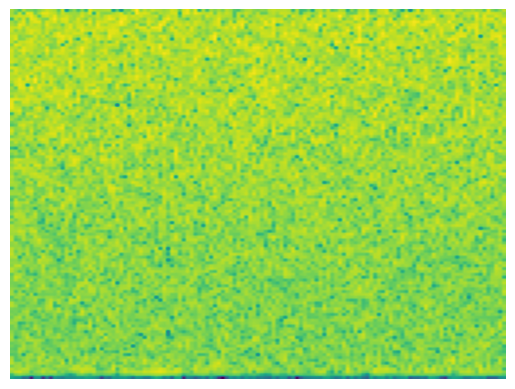

In [23]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 14
wvfrm = 
l =  1300  SNR =  9.844226900340526  m1 =  25  m2 =  14
22 20
wvfrm = 
l =  1301  SNR =  10.729705072084606  m1 =  22  m2 =  20
20 17
wvfrm = 
l =  1302  SNR =  9.897750711305967  m1 =  20  m2 =  17
21 18
wvfrm = 
l =  1303  SNR =  9.226286700275585  m1 =  21  m2 =  18
17 19
wvfrm = 
l =  1304  SNR =  9.890138057675001  m1 =  17  m2 =  19
22 26
wvfrm = 
l =  1305  SNR =  9.117894954315624  m1 =  22  m2 =  26
29 11
wvfrm = 
l =  1306  SNR =  8.836308213769351  m1 =  29  m2 =  11
16 13
wvfrm = 
l =  1307  SNR =  7.48453918031591  m1 =  16  m2 =  13
26 21
wvfrm = 
l =  1308  SNR =  10.200732825783351  m1 =  26  m2 =  21
26 19
wvfrm = 
l =  1309  SNR =  9.221806570931397  m1 =  26  m2 =  19
15 26
wvfrm = 
l =  1310  SNR =  6.832900295753075  m1 =  15  m2 =  26
16 27
wvfrm = 
l =  1311  SNR =  9.074921693807138  m1 =  16  m2 =  27
11 20
wvfrm = 
l =  1312  SNR =  6.944847302522855  m1 =  11  m2 =  20
19 14
wvfrm = 
l =  1313  SNR =  8.31650565696881  m1 =  19  m2 =  14
15 14


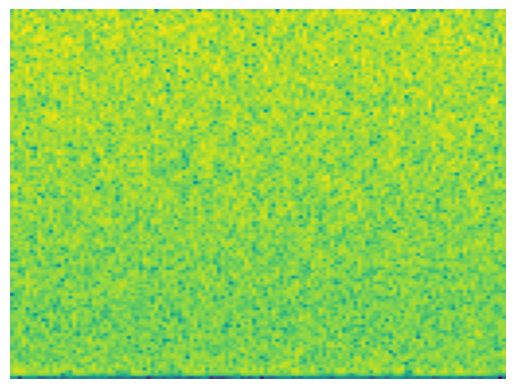

In [24]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 26
wvfrm = 
l =  1400  SNR =  9.102072566272335  m1 =  25  m2 =  26
26 29
wvfrm = 
l =  1401  SNR =  11.80259263832119  m1 =  26  m2 =  29
17 21
wvfrm = 
l =  1401  SNR =  8.549281179368416  m1 =  17  m2 =  21
19 26
wvfrm = 
l =  1402  SNR =  10.097735188189342  m1 =  19  m2 =  26
21 27
wvfrm = 
l =  1403  SNR =  10.652703183205904  m1 =  21  m2 =  27
24 30
wvfrm = 
l =  1404  SNR =  9.14246121962932  m1 =  24  m2 =  30
27 19
wvfrm = 
l =  1405  SNR =  8.970775728384584  m1 =  27  m2 =  19
19 22
wvfrm = 
l =  1406  SNR =  10.261606208997739  m1 =  19  m2 =  22
29 26
wvfrm = 
l =  1407  SNR =  11.553318586081403  m1 =  29  m2 =  26
30 13
wvfrm = 
l =  1407  SNR =  8.036427079806796  m1 =  30  m2 =  13
12 10
wvfrm = 
l =  1408  SNR =  7.3947255337692885  m1 =  12  m2 =  10
11 28
wvfrm = 
l =  1409  SNR =  8.068580186902453  m1 =  11  m2 =  28
23 16
wvfrm = 
l =  1410  SNR =  7.206398633415252  m1 =  23  m2 =  16
21 27
wvfrm = 
l =  1411  SNR =  10.668057868588841  m1 =  21  m2 =  27
1

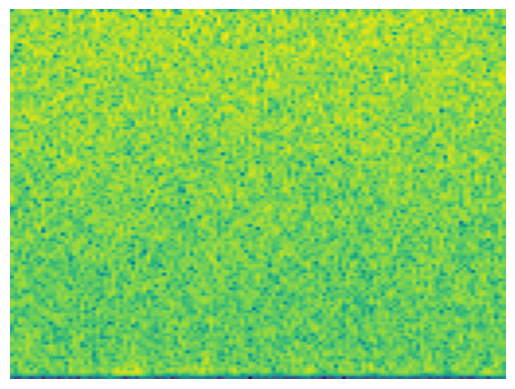

In [25]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

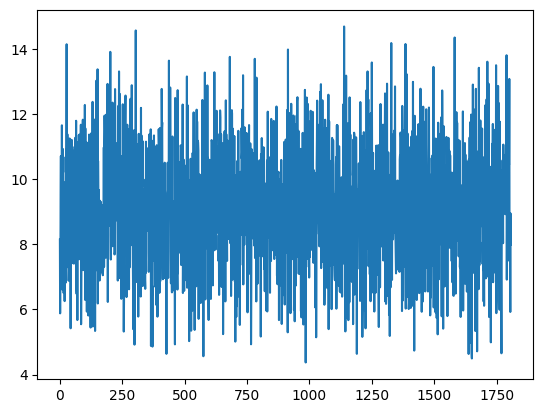

In [26]:
plt.plot(SNR_array_3)

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
